In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math

In [0]:
data = []

for i in range(14):
  data.append(np.loadtxt('test_data_{}'.format(i+1)))
  


In [12]:
#Borro los datos de las mediciones que no van: test_data_2 (i=1) y test_data_11 (i=10)

data.pop(1)
data.pop(9)

#CORRER UNA SOLA VEZ

array([[0.0000000e+00, 2.5196810e+00, 2.7730700e+00],
       [2.0000000e-02, 2.5195970e+00, 2.0687980e+00],
       [4.0000000e-02, 2.5197520e+00, 4.4293620e+00],
       ...,
       [5.9959999e+01, 3.1934260e+00, 4.4206910e+00],
       [5.9979999e+01, 3.1713770e+00, 4.4211190e+00],
       [5.9999999e+01, 3.1460180e+00, 4.4213210e+00]])

In [0]:
data14 = np.loadtxt('CAL_DIN.TXT')

In [0]:
uploaded = files.upload() #los archivos test_data_i

In [0]:
uploaded2 = files.upload() #archivo CAL_DIN.TXT

Saving CAL_DIN.TXT to CAL_DIN.TXT


In [0]:
uploaded3 = files.upload() #maxs/mins/proms_cal-est.txt

Saving proms_cal-est.txt to proms_cal-est.txt
Saving mins_cal-est.txt to mins_cal-est.txt
Saving maxs_cal-est.txt to maxs_cal-est.txt


In [0]:
data1 = pd.read_csv(io.BytesIO(uploaded['test_data_1']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger']) 
data0 = pd.read_csv(io.BytesIO(uploaded['test_data_2']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger']) #La de Nacho
data2 = pd.read_csv(io.BytesIO(uploaded['test_data_3']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data3 = pd.read_csv(io.BytesIO(uploaded['test_data_4']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data4 = pd.read_csv(io.BytesIO(uploaded['test_data_5']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data5 = pd.read_csv(io.BytesIO(uploaded['test_data_6']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data6 = pd.read_csv(io.BytesIO(uploaded['test_data_7']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data7 = pd.read_csv(io.BytesIO(uploaded['test_data_8']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data8 = pd.read_csv(io.BytesIO(uploaded['test_data_9']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data9 = pd.read_csv(io.BytesIO(uploaded['test_data_10']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
#data10 = pd.read_csv(io.BytesIO(uploaded['test_data_11']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data10 = pd.read_csv(io.BytesIO(uploaded['test_data_12']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data11 = pd.read_csv(io.BytesIO(uploaded['test_data_13']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])
data12 = pd.read_csv(io.BytesIO(uploaded['test_data_14']),sep='\t',header=None,names = ['tiempo', 'lectura', 'trigger'])

In [0]:
data14 = pd.read_csv(io.BytesIO(uploaded2['CAL_DIN.TXT']),sep='\t',header=None,names = ['tiempo', 'lectura'])

data15 = np.loadtxt('maxs_cal-est.txt')
data16 = np.loadtxt('mins_cal-est.txt')
data17 = np.loadtxt('proms_cal-est.txt')



In [0]:
tanda_prueba = data14[:196] #prueba de tiempos
tanda_ni_idea = data14[197:228]
tanda1 = data14[229:1026]
tanda2 = data14[1027:1832]
tanda3 = data14[1833:2622]
tanda4 = data14[2623:3378]
tanda5 = data14[3379:4131]
tanda6 = data14[4132:4896]
tanda7 = data14[4897:5658]
tanda8 = data14[5659:6409]
tanda9 = data14[6410:7183]
tanda10 = data14[7958:8720]
tanda11 = data14[8721:9475]
tanda12 = data14[9476:10217]
largo = np.arange(1,13)

tanda = [tanda1, tanda2, tanda3, tanda4, tanda5, tanda6, tanda7, tanda8, tanda9, tanda10, tanda11, tanda12, tanda12]

In [0]:
def fuerza(volt):
  a=26.78885525
  b=-67.40046261
  sigma_a=0.05
  sigma_b=0.05
  f = a*volt + b
  return f

def redondeo(tiempo_S):
  tiempo = []
    
  for i in tiempo_S:
    tiempo_aux = int(i*100)/2
    if tiempo_aux-int(tiempo_aux)==0:
      tiempo.append(tiempo_aux*2/100)
      
    else:
      tiempo.append((tiempo_aux*2 + 1)/100)
    
  return tiempo

In [0]:
#offset en intervalos de 20 segundos
offset=np.matrix([[0.1,0.3,0.5], # a partir de 10.5 segundos
                 [0.84,1.02,1.26],
                 [0.84,0.9,1.2],
                 [0.3,0.4,0.6], # a partir de 9 segundos
                 [0.5,0.66,0.86],
                 [1.2,1.3,1.4],
                 [0.16,0.36,0.56], #hasta 58 segundos
                 [0.9,1.04,1.22], #hasta 59 segundos
                 [0.64,0.88,1.02],
                 [0.68,0.8,0.92],
                 [0.5,0.54,0.74],
                 [0.36,0.58,0.68],
                 [0.64,0.86,1.14]]) #segundos

In [61]:
len(data[i][:,0])

3001

In [0]:
#Defino tiempo y fuerza del sensor Vernier
Tiempo_V=[]
Fuerza_V=[]
cant = len(data)
for i in range(cant): 
  t_aux, f_aux = [], []
  for j in range(len(data[i][:,0])):
    t_aux.append(round(data[i][j,0],2))
    f_aux.append(fuerza(data[i][j,1]))
  Tiempo_V.append(t_aux)
  Fuerza_V.append(f_aux)

#Redefino tiempos Sensores restando offset inicial y el voltaje lo paso a V  
Tiempo_S=[]
Voltaje_S=[]
for i in range(cant): 
  Tiempo_S.append(np.array(redondeo(np.array((tanda[i][:,0]-tanda[i][0,0])/1000))))
  Voltaje_S.append(np.array(tanda[i][:,1]*5/1023))
  
#Redefino tiempos Sensores restando offset delay
Tiempo_Sensor=[]
Voltaje_Sensor=[]
for i in range(12):
  T=[]
  V=[]
  for j in range(len(Tiempo_S[i])):
    if 0<=Tiempo_S[i][j]<20:
      T.append(round(Tiempo_S[i][j]+offset[i,0],2))
      V.append(Voltaje_S[i][j])
    elif 20<=Tiempo_S[i][j]<40:
      T.append(round(Tiempo_S[i][j]+offset[i,1],2))
      V.append(Voltaje_S[i][j])
    elif 40<=Tiempo_S[i][j]<60:
      if Tiempo_S[i][j]+offset[i,2]<60:
        T.append(round(Tiempo_S[i][j]+offset[i,2],2))
        V.append(Voltaje_S[i][j])
  Tiempo_Sensor.append(T) 
  Voltaje_Sensor.append(V)

  
#Elijo los tiempos del Vernier que se solapen con los del sensor
Tiempo_Vernier=[]
Fuerza_Vernier=[] 
for i in range(cant):
  indices_selec=[]
  for t in Tiempo_Sensor[i]:
    t_aux = []
    f_aux= []
    if 0<=t<60:
      indices_selec.append(int(list(Tiempo_V[i]).index(t)))
      t_aux.append(Tiempo_V[i][indices_selec[-1]])
      f_aux.append(Fuerza_V[i][indices_selec[-1]])

  Tiempo_Vernier.append(t_aux)
  Fuerza_Vernier.append(f_aux) 
  
#Defino el error de voltaje del Sensor (calculado en Calibracion_estatica.ipynb)
err_Voltajes = 0.143


In [0]:
""" # Para cuando subíamos los archivos con pd

#Defino tiempo y fuerza del sensor Vernier
Tiempo_V=[]
Fuerza_V=[]
for i in largo: 
  Tiempo_V.append(np.array(round(eval('data'+str(i)).tiempo,2)))
  Fuerza_V.append(np.array(fuerza(eval('data'+str(i)).lectura)))

#Redefino tiempos Sensores restando offset inicial y el voltaje lo paso a V  
Tiempo_S=[]
Voltaje_S=[]
for i in largo: 
  Tiempo_S.append(np.array(redondeo(np.array((eval('tanda'+str(i)).tiempo-eval('tanda'+str(i)).tiempo.iloc[0])/1000))))
  Voltaje_S.append(np.array(eval('tanda'+str(i)).lectura*5/1023))

#Redefino tiempos Sensores restando offset delay
Tiempo_Sensor=[]
Voltaje_Sensor=[]
for i in range(12):
  T=[]
  V=[]
  for j in range(len(Tiempo_S[i])):
    if 0<=Tiempo_S[i][j]<20:
      T.append(round(Tiempo_S[i][j]+offset[i,0],2))
      V.append(Voltaje_S[i][j])
    elif 20<=Tiempo_S[i][j]<40:
      T.append(round(Tiempo_S[i][j]+offset[i,1],2))
      V.append(Voltaje_S[i][j])
    elif 40<=Tiempo_S[i][j]<60:
      if Tiempo_S[i][j]+offset[i,2]<60:
        T.append(round(Tiempo_S[i][j]+offset[i,2],2))
        V.append(Voltaje_S[i][j])
  Tiempo_Sensor.append(T) 
  Voltaje_Sensor.append(V)

#Elijo los tiempos del Vernier que se solapen con los del sensor
Tiempo_Vernier=[]
Fuerza_Vernier=[] 
for i in range(12):
  indices_selec=[]
  for t in Tiempo_Sensor[i]:
    if 0<=t<60:
      indices_selec.append(int(list(Tiempo_V[i]).index(t)))
  Tiempo_Vernier.append(Tiempo_V[i][indices_selec])
  Fuerza_Vernier.append(Fuerza_V[i][indices_selec]) 
  
#Defino el error de voltaje del Sensor (calculado en Calibracion_estatica.ipynb)
err_Voltajes = 0.143
"""

In [0]:
numero = 1
print(len(Tiempo_Sensor[numero]), len(Voltaje_Sensor[numero]), len(Tiempo_Vernier[numero]), len(Fuerza_Vernier[numero]))


724 724 724 724


ValueError: ignored

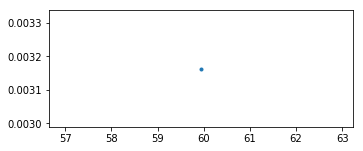

In [70]:
plt.figure(figsize=(12,15))
for i in range(12):
  plt.subplot(6,2,i+1)
  plt.plot(Tiempo_Vernier[i],Fuerza_Vernier[i],'.',label='Vernier')
  plt.plot(Tiempo_Sensor[i],Voltaje_Sensor[i]*10,'.',label='Sensor')
  plt.grid()
  plt.legend()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Fuerza (N)')
  plt.ylim(0,70)
  

<Figure size 360x216 with 0 Axes>

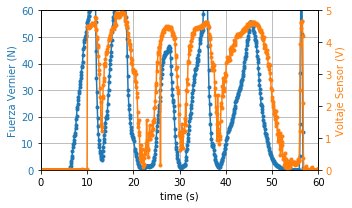

<Figure size 360x216 with 0 Axes>

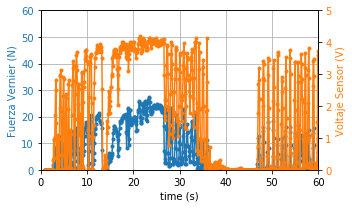

<Figure size 360x216 with 0 Axes>

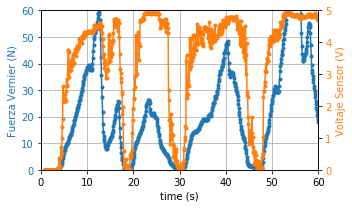

<Figure size 360x216 with 0 Axes>

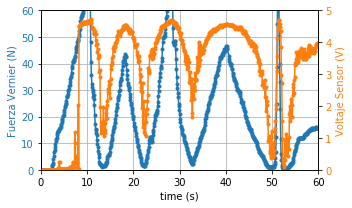

<Figure size 360x216 with 0 Axes>

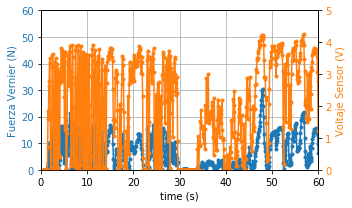

<Figure size 360x216 with 0 Axes>

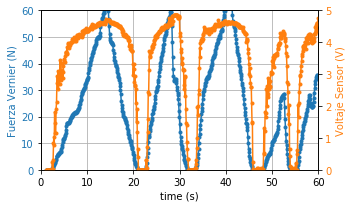

<Figure size 360x216 with 0 Axes>

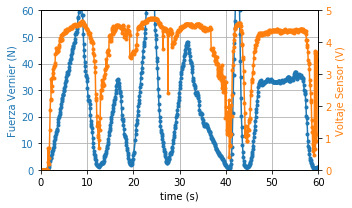

<Figure size 360x216 with 0 Axes>

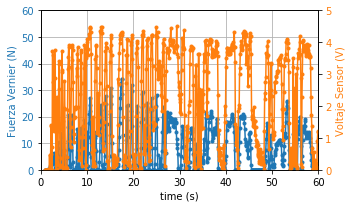

<Figure size 360x216 with 0 Axes>

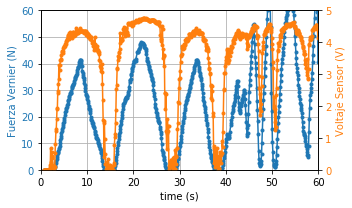

<Figure size 360x216 with 0 Axes>

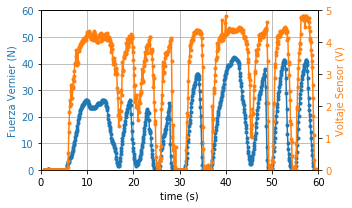

<Figure size 360x216 with 0 Axes>

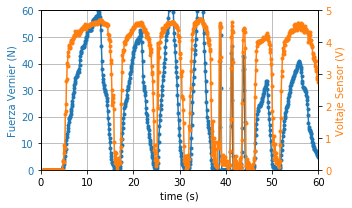

<Figure size 360x216 with 0 Axes>

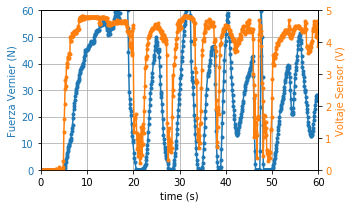

In [0]:

for i in range(12):  
  plt.figure(figsize=(5,3))
  fig, ax1 = plt.subplots(figsize=(5,3))
  num=i

  color = 'tab:blue'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('Fuerza Vernier (N)', color=color)
  ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_ylim(0,60)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:orange'
  ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
  ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.set_ylim(0,5)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.grid()
  plt.xlim(0,60)
  plt.show()

In [0]:
"""
plt.figure(figsize=(12,15))

for i in largo: 
  plt.subplot(7,2,i)
  plt.plot(eval('tanda'+str(i)).tiempo/1000, eval('tanda'+str(i)).lectura*5/1023, 'g')
  plt.plot(eval('data'+str(i)).tiempo, eval('data'+str(i)).lectura, 'y')
  plt.grid()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Voltaje (V)')
  


plt.show()
"""

"\nplt.figure(figsize=(12,15))\n\nfor i in largo: \n  plt.subplot(7,2,i)\n  plt.plot(eval('tanda'+str(i)).tiempo/1000, eval('tanda'+str(i)).lectura*5/1023, 'g')\n  plt.plot(eval('data'+str(i)).tiempo, eval('data'+str(i)).lectura, 'y')\n  plt.grid()\n  plt.xlabel('Tiempo (seg)')\n  plt.ylabel('Voltaje (V)')\n  \n\n\nplt.show()\n"

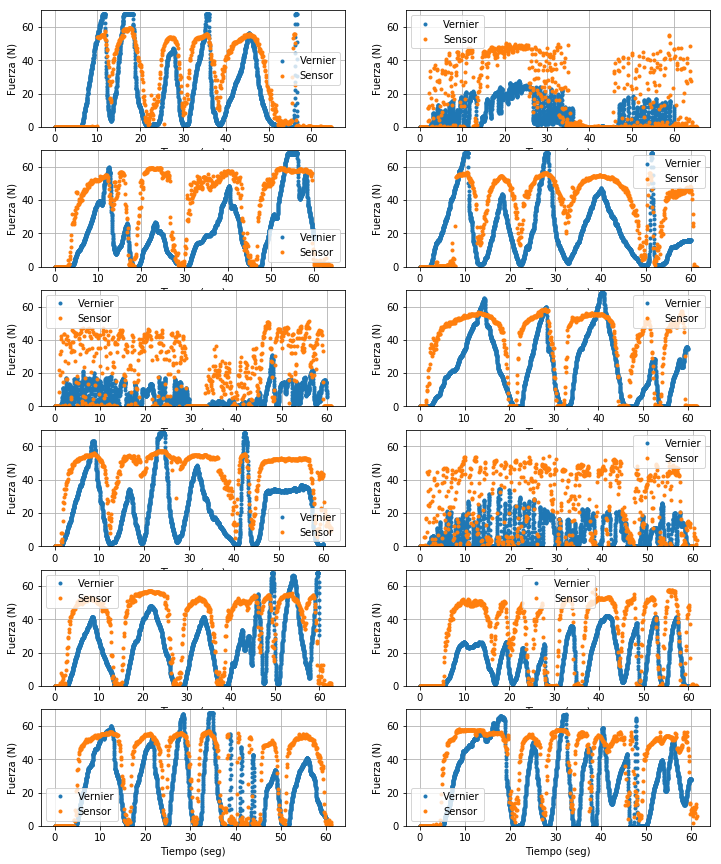

In [0]:
plt.figure(figsize=(12,15))
for i in range(12):
  plt.subplot(6,2,i+1)
  plt.plot(Tiempo_V[i],Fuerza_V[i],'.',label='Vernier')
  plt.plot(Tiempo_S[i],12*Voltaje_S[i],'.',label='Sensor')
  plt.grid()
  plt.legend()
  plt.xlabel('Tiempo (seg)')
  plt.ylabel('Fuerza (N)')
  plt.ylim(0,70)

<Figure size 720x432 with 0 Axes>

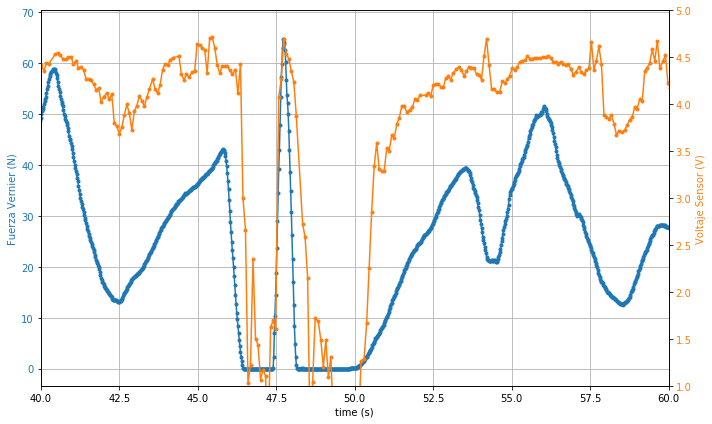

In [0]:
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots(figsize=(10,6))
num=11

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Fuerza Vernier (N)', color=color)
ax1.plot(Tiempo_V[num],Fuerza_V[num],'.-',label='Vernier', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
ax2.plot(Tiempo_S[num]+1.14,Voltaje_S[num],'.-',label='Sensor', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1,5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
plt.xlim(40,60)
plt.show()

<Figure size 360x216 with 0 Axes>

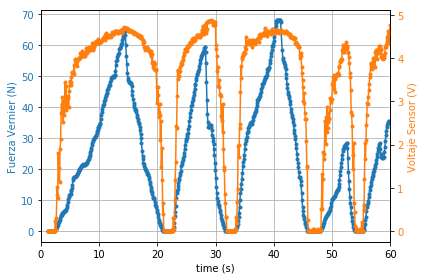

In [0]:
plt.figure(figsize=(5,3))
fig, ax1 = plt.subplots(figsize=(6,4))
num=5

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Fuerza Vernier (N)', color=color)
ax1.plot(Tiempo_Vernier[num],Fuerza_Vernier[num],'.-',label='Vernier', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
ax2.set_ylabel('Voltaje Sensor (V)', color=color)  # we already handled the x-label with ax1
ax2.plot(Tiempo_Sensor[num],Voltaje_Sensor[num],'.-',label='Sensor', color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(1,5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
plt.xlim(0,60)
plt.show()

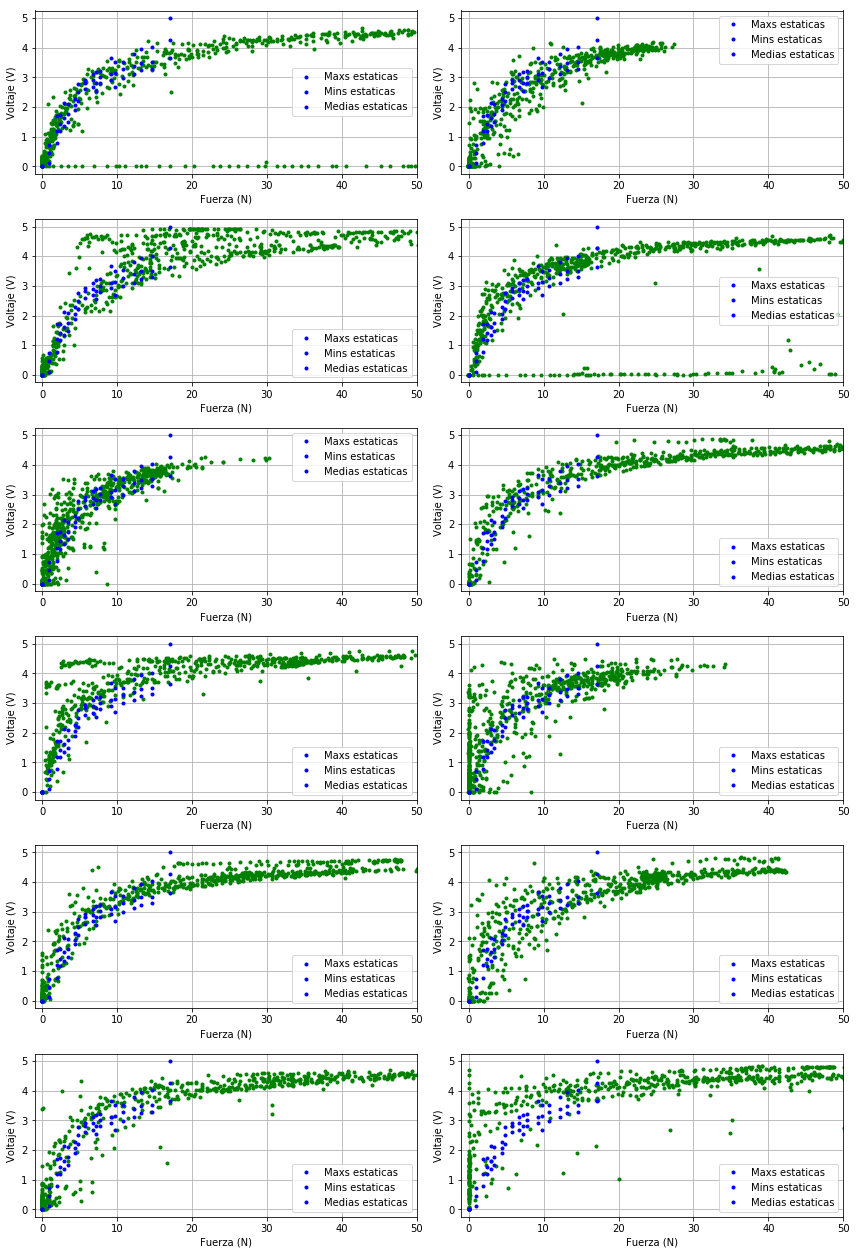

In [0]:
plt.figure(figsize=(12,20))
for i in range(12):
  plt.subplot(7,2,i+1)
  med = i
  plt.plot(Fuerza_Vernier[med],Voltaje_Sensor[med],'g.')
  plt.plot(data15[0,:], data15[1,:], 'b.', label=('Maxs estaticas'))
  plt.plot(data16[0,:], data16[1,:], 'b.', label=('Mins estaticas'))
  plt.plot(data17[0,:], data17[1,:], 'b.', label=('Medias estaticas'))
  plt.grid()
  plt.legend()
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(-1,50)
  plt.tight_layout()
  
plt.show()

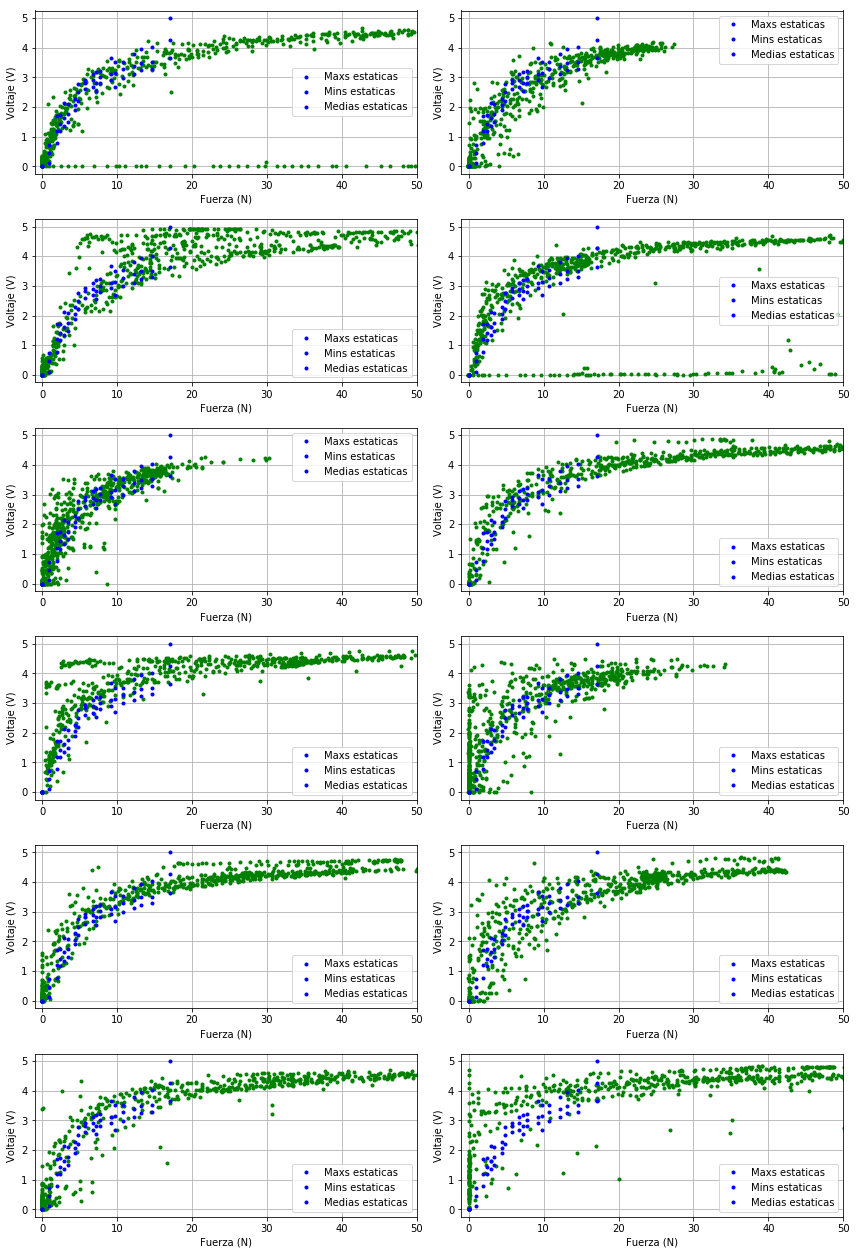

In [0]:
plt.figure(figsize=(12,20))
for i in range(12):
  plt.subplot(7,2,i+1)
  med = i
  plt.plot(Fuerza_Vernier[med],np.array(Voltaje_Sensor[med])[np.where(np.array(Tiempo_Sensor[med])<60)],'g.')
  plt.plot(data15[0,:], data15[1,:], 'b.', label=('Maxs estaticas'))
  plt.plot(data16[0,:], data16[1,:], 'b.', label=('Mins estaticas'))
  plt.plot(data17[0,:], data17[1,:], 'b.', label=('Medias estaticas'))
  plt.grid()
  plt.legend()
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Voltaje (V)')
  plt.xlim(-1,50)
  plt.tight_layout()
  
plt.show()

In [0]:
med = 8
ventana = 4
maxs8,mins8,meds8,masa_maxs,masa_mins,masa_meds,ind_maxs,ind_mins,ind_meds=[],[],[],[],[],[],[],[],[]
for i in range(len(Voltaje_Sensor[med])-ventana):
  maxs8.append(np.max(Voltaje_Sensor[med][i:i+ventana]))
  mins8.append(np.min(Voltaje_Sensor[med][i:i+ventana]))
  meds8.append(np.mean(Voltaje_Sensor[med][i:i+ventana]))
  ind_maxs.append(np.where(np.array(Voltaje_Sensor[med]==maxs8[-1]))[0][0])
  ind_mins.append(np.where(np.array(Voltaje_Sensor[med]==mins8[-1]))[0][0])
  ind_meds.append(np.where(np.array(Voltaje_Sensor[med]==meds8[-1]))[0][0])
  masa_maxs.append(Fuerza_Vernier[med][ind_maxs])
  masa_mins.append(Fuerza_Vernier[med][ind_mins])
  masa_meds.append(Fuerza_Vernier[med][ind_meds])


IndexError: ignored

In [0]:
numero=8
#Tiempo_Sensor[numero], Voltaje_Sensor[numero], Tiempo_Vernier[numero], Fuerza_Vernier[numero]
dict_Vernier = dict({ i: Fuerza_Vernier[numero][i] for i  in range(len(Fuerza_Vernier[numero])) })

In [0]:
forces=sorted(set(sorted(dict_Vernier.values())))
indices_ordenados=[]
for j in forces:
  for index, force in dict_Vernier.items():
    if force == j:
        indices_ordenados.append(index)

In [0]:
Fuerza_ordenada=[]
Voltaje_ordenado=[]
for ind in indices_ordenados:
  if Fuerza_Vernier[numero][ind]<51:
    Fuerza_ordenada.append(Fuerza_Vernier[numero][ind])
    Voltaje_ordenado.append(Voltaje_Sensor[numero][ind])

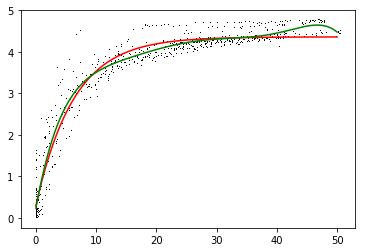

In [0]:
plt.plot(Fuerza_ordenada,Voltaje_ordenado,',k')
plt.plot(x_p,expo(x_p,h,i,j),'r')
plt.plot(x_p,np.polyval(P,x_p),'g')

In [0]:
med = 8
ventana = 10
maxs8,mins8,meds8,masa_maxs,masa_mins,masa_meds,ind_maxs,ind_mins,ind_meds=[],[],[],[],[],[],[],[],[]
for i in range(np.where(np.array(Fuerza_ordenada)>50)[0][0]-ventana):
  maxs8.append(np.max(Voltaje_ordenado[i:i+ventana]))
  mins8.append(np.min(Voltaje_ordenado[i:i+ventana]))
  meds8.append(np.median(Voltaje_ordenado[i:i+ventana]))
  ind_maxs.append(i+np.where(np.array(Voltaje_ordenado[i:i+ventana]==maxs8[-1]))[0][-1])
  ind_mins.append(i+np.where(np.array(Voltaje_ordenado[i:i+ventana]==mins8[-1]))[0][-1])
  ind_meds.append(int(i+ventana/2))
  masa_maxs.append(Fuerza_ordenada[ind_maxs[-1]])
  masa_mins.append(Fuerza_ordenada[ind_mins[-1]])
  masa_meds.append(Fuerza_ordenada[ind_meds[-1]])


In [0]:
np.where(np.array(Fuerza_ordenada)>50)[0][0]

668

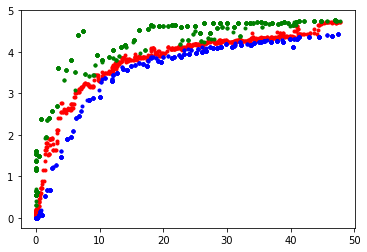

In [0]:
#plt.plot(Fuerza_ordenada,Voltaje_ordenado,'.k')
plt.plot(masa_meds,meds8,'.r')
plt.plot(masa_mins,mins8,'.b')
plt.plot(masa_maxs,maxs8,'.g')


In [0]:
grado=5
pmin=np.polyfit(masa_mins,mins8,grado)
pmax=np.polyfit(masa_maxs,maxs8,grado)
pmean=np.polyfit(masa_meds,meds8,grado)

print(pmean)

[ 3.65809922e-07 -4.90226311e-05  2.50144184e-03 -6.09685904e-02
  7.42956883e-01  1.54055675e-01]


(0, 5)

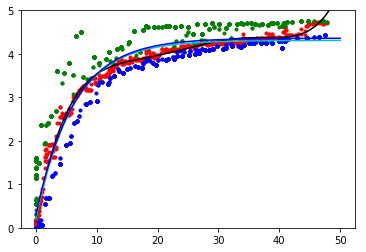

In [0]:
x_p=np.linspace(0,50,1001)
plt.plot(masa_meds,meds8,'.r')
plt.plot(masa_mins,mins8,'.b')
plt.plot(masa_maxs,maxs8,'.g')


plt.plot(x_p,np.polyval(pmean,x_p),'k')
plt.plot(x_p,expo(x_p,e,f,g),'c')
plt.plot(x_p,expo(x_p,h,i,j),'b')

plt.ylim(0,5)

In [0]:
(5/0.1)*(1- np.exp(-0.1*50))

49.66310265004573

In [0]:
def pol(x, a, b, c, d):
  
  y = a*x**4 + b*x**3 + c*x**2 + d*x
  return y

def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

  
def prediccion_pol(x,error_x,params,cov_params):
    df=df_pol(x,params)
    Y=params[0]*x**4+params[1]*x**3+params[2]*x**2+params[3]*x
    sigma_Y=np.sqrt((df[0]**2)*cov_params[0,0]+(df[1]**2)*cov_params[1,1]
                    +((df[2]**2)*cov_params[2,2])+((df[3]**2)*cov_params[3,3])
                   +2*df[0]*df[1]*cov_params[0,1]+2*df[0]*df[2]*cov_params[0,2]
                    +2*df[0]*df[3]*cov_params[0,3]+2*df[1]*df[2]*cov_params[1,2]
                   +2*df[1]*df[3]*cov_params[1,3]+2*df[2]*df[3]*cov_params[2,3])
    return(Y,sigma_Y)


def df_pol(x,params):
  a=params[0]
  b=params[1]
  c=params[2]
  d=params[3]
  df=np.zeros(4)
  df[0]=4*a*x**3
  df[1]=3*b*x**2
  df[2]=2*c*x
  df[3]=d
  return(df)

In [0]:
err=np.ones(len(meds8))*0.05
popt, pcov = curve_fit(pol, masa_meds,meds8, p0=[  0, 0,  4.21500180e-01,  4.60688382e-01], sigma=err)#p0=[0, 0.3],
a,b,c,d=popt[0], popt[1], popt[2],popt[3]

print(a,b,c,d)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

-7.850892383881718e-06 0.0009136032295449651 -0.03731424624666146 0.6470872066575349


In [0]:
P=np.polyfit(Fuerza_ordenada,Voltaje_ordenado,6)
P

array([-1.27486299e-08,  2.08179573e-06, -1.34625651e-04,  4.42454862e-03,
       -7.93826428e-02,  7.93523371e-01,  2.34952283e-01])

In [0]:
err=np.ones(len(meds8))*0.05
popt, pcov = curve_fit(expo, masa_meds,meds8, p0=[  0, -0.1,  0.5], sigma=err)#p0=[0, 0.3],
e,f,g=popt[0], popt[1], popt[2]

print(e,f,g)
#print(a_aj, err_a, b_aj, err_b, c_aj, err_c)

0.1883573857244366 -0.6804795922062081 0.16512242973501362


In [0]:
err=np.ones(len(Voltaje_ordenado))*0.05
popt, pcov = curve_fit(expo, Fuerza_ordenada,Voltaje_ordenado, p0=[  0, -0.1,  0.5], sigma=err)#p0=[0, 0.3],
h,i,j=popt[0], popt[1], popt[2]

print(h,i,j)

0.2952361090461071 -0.6479204811537184 0.1594099907618087


0.18835626868852182 -0.6804811776652504 0.16512281040648663


In [0]:
np.savetxt('pocosmedsx.txt', pocosmedsx)
np.savetxt('pocosmedsy.txt', pocosmedsy)

In [0]:
xp=np.arange(0,1750,1)
yp,sigma_yp=np.zeros(len(xp)),np.zeros(len(xp))
for i in range(len(xp)):
  yp[i],sigma_yp[i]=prediccion(xp[i],0.1,popt,pcov)
banda_u=yp+sigma_yp
banda_l=yp-sigma_yp

In [0]:
x = np.arange(0,1750,1)
plt.figure(figsize=(8,5))
plt.errorbar(masa,meds, yerr=0,fmt='.', ecolor='r')
plt.plot(masa,maxs,'.r')
plt.plot(masa,mins,'.b')
plt.plot(masa,meds,'.g')
plt.plot(x, pol(x, a,b,c,d), 'g-')
#plt.plot(xp,banda_u,'c')
#plt.plot(xp,banda_l,'c')
plt.xlabel('Masa [g]')
plt.ylabel('Tensión [V]')
plt.grid()

-----------------------------------------------------------------------------------------------------------